# Loading the Data

In [1]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv("/kaggle/input/mlx-2-0-regression/train.csv")
test = pd.read_csv("/kaggle/input/mlx-2-0-regression/test.csv")

In [4]:
df.head()

,id,emotional_charge_2,groove_efficiency_1,beat_frequency_1,organic_texture_2,composition_label_0,harmonic_scale_1,intensity_index_0,duration_ms_0,album_name_length,beat_frequency_0,beat_frequency_2,artist_count,composition_label_1,publication_timestamp,weekday_of_release,album_component_count,emotional_charge_1,emotional_charge_0,tonal_mode_2,key_variety,performance_authenticity_2,performance_authenticity_0,season_of_release,time_signature_1,duration_ms_2,lunar_phase,instrumental_density_2,organic_texture_0,creator_collective,vocal_presence_2,tonal_mode_1,vocal_presence_1,vocal_presence_0,intensity_index_1,organic_immersion_0,tonal_mode_0,groove_efficiency_2,instrumental_density_1,organic_immersion_2,duration_consistency,composition_label_2,organic_texture_1,rhythmic_cohesion_0,track_identifier,emotional_resonance_1,rhythmic_cohesion_1,performance_authenticity_1,tempo_volatility,organic_immersion_1,groove_efficiency_0,emotional_resonance_2,time_signature_0,duration_ms_1,harmonic_scale_0,time_signature_2,rhythmic_cohesion_2,emotional_resonance_0,harmonic_scale_2,intensity_index_2,instrumental_density_0,target
0,76339,0.482850,1.169231,80.018,0.0201,Country Stuff (feat. Jake Owen),1.0,0.789,154586.0,NaN,95.992,162.045,NaN,Fancy Like,2021-06-04,Friday,6.0,0.640680,0.478923,1.0,2.0,0.1120,0.336,summer,4.0,189853.0,waning,0.000000,0.09900,"Walker Hayes,",0.0322,1.0,0.0574,0.1420,NaN,0.255067,1.0,NaN,0.000000,0.063601,15204.423983,NaN,0.1140,0.685,NaN,0.843,0.649,0.3170,82.027,0.307521,1.150146,0.666,4.0,161853.0,7.0,4.0,NaN,0.607,7.0,0.7250,0.000000,74
1,80006,0.267862,1.321321,147.966,0.3340,Solitude,6.0,0.715,46874.0,15.0,148.076,125.964,2.0,TryHard,2019-07-01,Monday,3.0,0.255200,0.559845,0.0,3.0,0.1720,0.752,summer,4.0,123272.0,waning,0.000083,0.00758,"Zpvrt,",NaN,0.0,0.7210,0.4760,0.880,NaN,1.0,0.879147,0.000000,0.686214,45592.954911,WontYouSaveMe,0.1310,0.523,BornTo DieAlone,0.290,0.665,0.0825,22.112,0.339768,NaN,0.361,4.0,155619.0,1.0,4.0,0.843,0.783,4.0,NaN,0.043200,2
2,83501,0.242606,1.285319,142.980,0.1110,BDFFRNT (Saved from Conformity),4.0,NaN,264665.0,7.0,124.738,134.403,2.0,Wow,2014-11-18,NaN,14.0,0.456576,0.148544,0.0,3.0,0.0828,0.189,autumn,4.0,302686.0,full,0.000000,0.44500,"Dillon Chase,",0.3280,0.0,0.4030,0.2890,0.928,1.962932,0.0,0.912121,0.000000,0.559969,38309.603777,NaN,0.0179,NaN,BDFFRNT,0.492,0.721,0.3970,18.242,0.062464,1.270758,0.403,4.0,209378.0,6.0,4.0,NaN,0.211,10.0,0.6020,0.000000,35
3,81530,0.426400,1.279435,123.063,0.1960,Headlights (feat. Ilsey),5.0,0.685,209208.0,5.0,NaN,107.936,2.0,Sugar (feat. Francesco Yates),2015-09-25,Friday,15.0,0.518340,0.252765,0.0,3.0,0.1560,0.182,autumn,4.0,187126.0,full,0.000000,0.02450,NaN,0.0630,0.0,0.0581,0.0367,0.815,0.085427,1.0,1.166430,0.000000,0.611278,13345.980827,Heatwave (feat. Akon),0.0185,0.597,Sugar,0.636,0.636,0.1630,NaN,0.067538,1.145485,0.520,4.0,219043.0,11.0,4.0,0.702,0.369,NaN,0.8200,0.000335,70
4,60534,0.000000,0.974906,132.722,0.0811,Afraid,6.0,0.856,215346.0,5.0,118.006,0.000,2.0,Maneater,2006-01-01,NaN,17.0,0.611499,0.540136,1.0,2.0,0.0000,0.697,winter,4.0,6413.0,waxing,0.000000,0.11300,"Nelly Furtado,",0.0000,1.0,0.0397,0.0430,0.777,0.405568,0.0,NaN,0.000358,0.008668,110199.561452,Promiscuous Interlude,0.0261,0.760,Loose,0.787,0.796,0.1210,132.722,0.112618,1.124836,0.000,4.0,258893.0,1.0,0.0,0.000,0.631,1.0,0.0221,0.000000,78


In [5]:
test.head()

,id,emotional_charge_2,groove_efficiency_1,beat_frequency_1,organic_texture_2,composition_label_0,harmonic_scale_1,intensity_index_0,duration_ms_0,album_name_length,beat_frequency_0,beat_frequency_2,artist_count,composition_label_1,publication_timestamp,weekday_of_release,album_component_count,emotional_charge_1,emotional_charge_0,tonal_mode_2,key_variety,performance_authenticity_2,performance_authenticity_0,season_of_release,time_signature_1,duration_ms_2,lunar_phase,instrumental_density_2,organic_texture_0,creator_collective,vocal_presence_2,tonal_mode_1,vocal_presence_1,vocal_presence_0,intensity_index_1,organic_immersion_0,tonal_mode_0,groove_efficiency_2,instrumental_density_1,organic_immersion_2,duration_consistency,composition_label_2,organic_texture_1,rhythmic_cohesion_0,track_identifier,emotional_resonance_1,rhythmic_cohesion_1,performance_authenticity_1,tempo_volatility,organic_immersion_1,groove_efficiency_0,emotional_resonance_2,time_signature_0,duration_ms_1,harmonic_scale_0,time_signature_2,rhythmic_cohesion_2,emotional_resonance_0,harmonic_scale_2,intensity_index_2,instrumental_density_0
0,25174,0.600480,1.543590,124.008,0.0729,Dr.Q,1.0,0.763,23032.0,4.0,124.262,94.006,2.0,嗯嘛,2011-10-21,Friday,15.0,0.709758,0.156415,1.0,3.0,0.0917,0.3500,autumn,4.0,283818.0,full,0.011500,0.59400,"QRIXWU,",0.0280,1.0,0.0410,0.0557,0.903,0.228017,1.0,1.190083,0.000000,0.344839,116542.523656,會,0.0193,NaN,Dr.Q,0.786,0.584,0.0852,30.256,0.081699,1.278057,0.834,4.0,253987.0,4.0,4.0,0.604,0.2050,0.0,0.720,0.165000
1,38453,NaN,0.722420,129.942,0.0105,Start A Party,11.0,0.801,215466.0,20.0,132.070,130.965,2.0,Real Chill,2016-08-12,Friday,14.0,0.112056,0.209061,0.0,3.0,0.3150,0.0925,summer,4.0,223733.0,full,NaN,0.00414,NaN,0.0592,1.0,0.1900,0.0448,0.609,NaN,1.0,0.562358,0.000000,0.039153,22890.086010,NaN,0.0443,NaN,SremmLife 2 (Deluxe),0.184,0.842,0.1060,2.128,0.197597,0.939039,0.216,4.0,267626.0,5.0,4.0,0.881,0.2610,1.0,0.496,0.000000
2,29013,0.461916,0.757962,83.000,0.2700,Sombras - Live,2.0,0.561,252261.0,44.0,NaN,NaN,2.0,Soñé - Live,2011-01-01,Saturday,NaN,0.238000,0.031135,NaN,2.0,0.7340,0.9740,winter,4.0,231874.0,new,0.000032,0.36700,"Zoé,",0.0348,1.0,0.0249,0.0462,NaN,1.542996,1.0,1.521583,0.014700,1.043433,11057.046511,Últimos Días - Live,0.1320,0.505,MTV Unplugged Música De Fondo (Reissue/Live),0.500,0.627,0.7160,63.942,0.498577,1.108696,0.546,4.0,226626.0,0.0,4.0,0.555,0.0555,0.0,0.846,0.002760
3,57463,0.144236,0.923977,183.991,0.1210,Tennis Court,2.0,NaN,198907.0,23.0,90.019,84.878,2.0,400 Lux,NaN,Tuesday,15.0,0.091956,0.220584,1.0,3.0,0.1320,0.2370,winter,4.0,190185.0,full,0.000000,0.01560,"Lorde,",0.1220,1.0,0.0371,0.0635,0.474,0.051716,1.0,0.634074,0.003450,0.383540,19069.012461,Royals,0.0787,NaN,Pure Heroine (Extended),NaN,0.512,0.1340,99.113,0.307305,0.719368,0.337,4.0,234286.0,0.0,4.0,0.674,0.4040,7.0,0.428,0.000194
4,51264,0.629832,1.473795,201.277,0.0610,La Cumbia Del Lazo,10.0,0.716,158720.0,NaN,197.715,204.821,2.0,Calamán Con Chévere,1988-01-01,Friday,10.0,0.676286,0.688792,1.0,2.0,0.0787,0.1060,winter,4.0,212320.0,waning,0.425000,0.20600,NaN,0.0638,1.0,0.2430,0.2410,0.703,0.544939,1.0,1.273438,0.000001,0.215859,21927.760184,Cumbia Del Grillo,0.4240,0.492,Cumbia Del Lazo,0.962,0.476,0.2540,7.106,1.332208,1.452333,0.966,4.0,188520.0,8.0,4.0,0.511,0.9620,10.0,0.652,0.000115


# EDA

## Dataset Overview

In [6]:
df.shape

(61609, 62)

In [7]:
test.shape

(41074, 61)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61609 entries, 0 to 61608
Data columns (total 62 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          61609 non-null  int64  
 1   emotional_charge_2          59167 non-null  float64
 2   groove_efficiency_1         61429 non-null  float64
 3   beat_frequency_1            61223 non-null  float64
 4   organic_texture_2           61226 non-null  float64
 5   composition_label_0         58660 non-null  object 
 6   harmonic_scale_1            58304 non-null  float64
 7   intensity_index_0           55638 non-null  float64
 8   duration_ms_0               60320 non-null  float64
 9   album_name_length           52015 non-null  float64
 10  beat_frequency_0            51878 non-null  float64
 11  beat_frequency_2            59843 non-null  float64
 12  artist_count                58348 non-null  float64
 13  composition_label_1         601

In [9]:
df.describe()

,id,emotional_charge_2,groove_efficiency_1,beat_frequency_1,organic_texture_2,harmonic_scale_1,intensity_index_0,duration_ms_0,album_name_length,beat_frequency_0,beat_frequency_2,artist_count,album_component_count,emotional_charge_1,emotional_charge_0,tonal_mode_2,key_variety,performance_authenticity_2,performance_authenticity_0,time_signature_1,duration_ms_2,instrumental_density_2,organic_texture_0,vocal_presence_2,tonal_mode_1,vocal_presence_1,vocal_presence_0,intensity_index_1,organic_immersion_0,tonal_mode_0,groove_efficiency_2,instrumental_density_1,organic_immersion_2,duration_consistency,organic_texture_1,rhythmic_cohesion_0,emotional_resonance_1,rhythmic_cohesion_1,performance_authenticity_1,tempo_volatility,organic_immersion_1,groove_efficiency_0,emotional_resonance_2,time_signature_0,duration_ms_1,harmonic_scale_0,time_signature_2,rhythmic_cohesion_2,emotional_resonance_0,harmonic_scale_2,intensity_index_2,instrumental_density_0,target
count,61609.000000,59167.000000,61429.000000,61223.000000,61226.000000,58304.000000,55638.000000,6.032000e+04,52015.000000,51878.000000,59843.000000,58348.000000,57246.000000,57595.000000,55505.000000,59800.000000,56204.000000,59695.000000,59504.000000,59746.000000,6.048100e+04,57455.000000,57272.000000,59075.000000,57211.000000,60744.000000,61499.000000,59491.000000,57766.000000,61328.000000,55863.000000,54132.000000,55974.000000,5.853200e+04,59481.000000,54426.000000,59642.000000,60610.000000,57924.000000,51192.000000,61471.000000,60133.000000,56733.000000,59704.000000,5.250400e+04,53925.000000,58455.000000,56049.000000,60063.000000,57142.000000,60916.000000,60900.000000,61609.000000
mean,51390.780162,0.316976,1.238856,121.022910,0.274748,5.192594,0.604426,2.011315e+05,18.225723,119.133973,120.716860,2.107030,15.738549,0.329987,0.299368,0.622625,2.649527,0.189882,0.212807,3.912915,2.133022e+05,0.132926,0.307938,0.121905,0.632990,0.120560,0.132766,0.629177,0.982007,0.622375,1.450475,0.128686,0.958566,3.639169e+04,0.265422,0.578358,0.492429,0.610905,0.197336,46.267820,0.924043,2.718967,0.481647,3.874849,2.110477e+05,5.212499,3.901274,0.612252,0.458851,5.288894,0.616045,0.148391,52.067328
std,29659.344472,0.212777,6.171617,30.467061,0.303020,3.629153,0.243943,1.100738e+05,14.404713,32.067971,30.937194,0.445663,28.085831,0.212602,0.218452,0.484734,0.522578,0.154810,0.178851,0.429358,9.310889e+04,0.293468,0.321859,0.134186,0.481993,0.131923,0.154879,0.230679,1.560839,0.484797,10.933386,0.290316,1.413096,4.141806e+04,0.299007,0.184751,0.249006,0.176884,0.163452,29.391937,1.449906,27.110423,0.251526,0.564558,8.911099e+04,3.571288,0.465295,0.179591,0.261196,3.567118,0.230109,0.306915,21.569248
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.485000e+03,1.000000,0.000000,0.000000,2.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.566000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.120000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,25832.000000,0.143877,0.730914,96.138000,0.027125,2.000000,0.447000,1.482340e+05,9.000000,94.802250,96.013000,2.000000,10.000000,0.157400,0.111180,0.000000,2.000000,0.098350,0.098500,4.000000,1.682500e+05,0.000000,0.028300,0.039000,0.000000,0.039800,0.039600,0.491000,0.086904,0.000000,0.720976,0.000000,0.089706,1.426506e+04,0.021000,0.460000,0.299000,0.503000,0.097700,21.844000,0.071162,0.718640,0.287000,4.000000,1.682000e+05,2.000000,4.000000,0.506000,0.243000,2.000000,0.477000,0.000000,37.000000
50%,51410.000000,0.291060,1.004894,120.012000,0.141000,5.000000,0.633000,1.959215e+05,14.000000,119.893000,120.000000,2.000000,13.000000,0.309849,0.267756,1.000000,3.000000,0.126000,0.135000,4.000000,2.061000e+05,0.000008,0.170000,0.060600,1.000000,0.060900,0.061700,0.659000,0.465423,1.000000,0.981084,0.000009,0.46081

## Missing Values

In [10]:
df.isnull().sum()

id                                0
emotional_charge_2             2442
groove_efficiency_1             180
beat_frequency_1                386
organic_texture_2               383
composition_label_0            2949
harmonic_scale_1               3305
intensity_index_0              5971
duration_ms_0                  1289
album_name_length              9594
beat_frequency_0               9731
beat_frequency_2               1766
artist_count                   3261
composition_label_1            1460
publication_timestamp          1508
weekday_of_release             5058
album_component_count          4363
emotional_charge_1             4014
emotional_charge_0             6104
tonal_mode_2                   1809
key_variety                    5405
performance_authenticity_2     1914
performance_authenticity_0     2105
season_of_release               473
time_signature_1               1863
duration_ms_2                  1128
lunar_phase                    1001
instrumental_density_2      

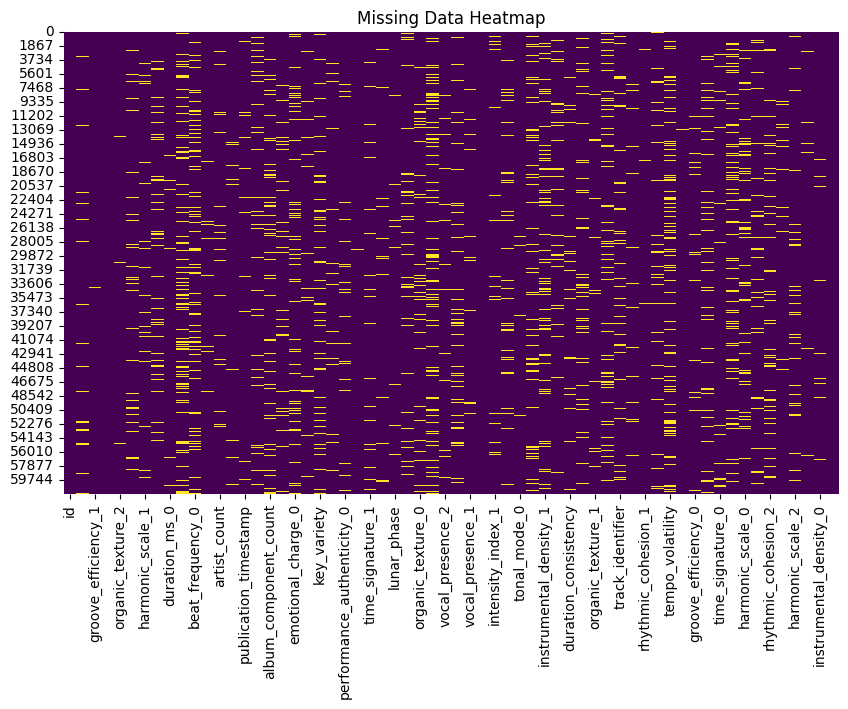

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False)
plt.title("Missing Data Heatmap")
plt.show()

# Handling Missing Values

In [12]:
numerical_cols = list(df.select_dtypes(include=["float64", "int64"]).columns)
categorical_cols = list(df.select_dtypes(include=["object"]).columns)
numerical_cols.remove("target")

In [13]:
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

test[numerical_cols] = test[numerical_cols].fillna(df[numerical_cols].mean())
test[categorical_cols] = test[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

In [14]:
df.isnull().sum()

id                            0
emotional_charge_2            0
groove_efficiency_1           0
beat_frequency_1              0
organic_texture_2             0
composition_label_0           0
harmonic_scale_1              0
intensity_index_0             0
duration_ms_0                 0
album_name_length             0
beat_frequency_0              0
beat_frequency_2              0
artist_count                  0
composition_label_1           0
publication_timestamp         0
weekday_of_release            0
album_component_count         0
emotional_charge_1            0
emotional_charge_0            0
tonal_mode_2                  0
key_variety                   0
performance_authenticity_2    0
performance_authenticity_0    0
season_of_release             0
time_signature_1              0
duration_ms_2                 0
lunar_phase                   0
instrumental_density_2        0
organic_texture_0             0
creator_collective            0
vocal_presence_2              0
tonal_mo

# Encoding Categorical Features

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [16]:
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
df[categorical_cols] = encoder.fit_transform(df[categorical_cols])
test[categorical_cols] = encoder.transform(test[categorical_cols])

In [17]:
# Save target and IDs
target = df['target']
test_ids = test['id']

In [18]:
# Remove ID and target from features
features = df.drop(['id', 'target'], axis=1)
test_features = test.drop(['id'], axis=1)

In [19]:
# Function to perform feature engineering
def feature_engineering(df):
    print("Starting feature engineering...")
    # Create a copy to avoid modifying the original dataframe
    data = df.copy()
    
    # Handle date features
    if 'publication_timestamp' in data.columns:
        data['publication_timestamp'] = pd.to_datetime(data['publication_timestamp'], errors='coerce')
        data['publication_year'] = data['publication_timestamp'].dt.year
        data['publication_month'] = data['publication_timestamp'].dt.month
        data['publication_dayofweek'] = data['publication_timestamp'].dt.dayofweek
        data['publication_quarter'] = data['publication_timestamp'].dt.quarter
        data.drop('publication_timestamp', axis=1, inplace=True)
    
    # Calculate key audio feature statistics
    audio_features = ['rhythmic_cohesion', 'intensity_index', 'organic_texture', 
                     'beat_frequency', 'emotional_charge']
    
    for feature in audio_features:
        feature_cols = [col for col in data.columns if feature in col and col.startswith(feature)]
        if feature_cols:
            data[f'avg_{feature}'] = data[feature_cols].mean(axis=1)
            data[f'max_{feature}'] = data[feature_cols].max(axis=1)
    
    # Calculate length of text features
    text_features = ['track_identifier', 'creator_collective']
    for feature in text_features:
        if feature in data.columns:
            data[f'{feature}_length'] = data[feature].astype(str).apply(len)
    
    # Handle composition labels
    comp_labels = [col for col in data.columns if 'composition_label' in col]
    for col in comp_labels:
        data[f"{col}_length"] = data[col].astype(str).apply(len)
    
    # Flag missing values in key columns
    missing_cols = [col for col in data.columns if data[col].isnull().sum() > 0]
    for col in missing_cols[:10]:  # Limit to 10 to avoid too many flags
        data[f'{col}_missing'] = data[col].isnull().astype(int)
    
    # Drop text columns to reduce memory usage
    cols_to_drop = text_features + comp_labels
    data = data.drop(cols_to_drop, axis=1)
    
    # Convert data types to save memory
    for col in data.columns:
        if data[col].dtype == 'float64':
            data[col] = data[col].astype('float32')
    
    print(f"Feature engineering complete. New shape: {data.shape}")
    return data

In [20]:
# Apply feature engineering
features_processed = feature_engineering(features)
test_features_processed = feature_engineering(test_features)

Starting feature engineering...
Feature engineering complete. New shape: (61609, 73)
Starting feature engineering...
Feature engineering complete. New shape: (41074, 73)


In [21]:
# Ensure both datasets have the same columns
common_columns = sorted(list(set(features_processed.columns) & set(test_features_processed.columns)))
print(f"Number of common features: {len(common_columns)}")

features_final = features_processed[common_columns]
test_features_final = test_features_processed[common_columns]

Number of common features: 73


# Splitting Data

In [22]:
# Split data
X_train, X_val, y_train, y_val = train_test_split(
    features_final, target, test_size=0.2, random_state=42
)

print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")


Training set shape: (49287, 73)
Validation set shape: (12322, 73)


# Feature Scaling

In [23]:
# Define preprocessing pipeline
print("Building preprocessing pipeline...")
categorical_cols = [col for col in common_columns if 
                   features_final[col].dtype == 'object' or 
                   (features_final[col].nunique() < 10 and 'year' not in col)]
numerical_cols = [col for col in common_columns if col not in categorical_cols]

print(f"Number of categorical features: {len(categorical_cols)}")
print(f"Number of numerical features: {len(numerical_cols)}")

Building preprocessing pipeline...
Number of categorical features: 18
Number of numerical features: 55


In [24]:
# Define preprocessing steps
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Model Training

In [25]:
# model = LinearRegression()
# model.fit(X_train, y_train)

In [26]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def train_and_evaluate(model, name):
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    start = time.time()
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_val)
    duration = time.time() - start

    return {
        'Model Name': name,
        'RMSE': rmse(y_val, y_pred),
        'R²': r2_score(y_val, y_pred),
        'MAE': mean_absolute_error(y_val, y_pred),
        'Accuracy': pipeline.score(X_val, y_val),
        'Training Time (s)': round(duration, 2)
    }


In [27]:
models = {
    'Extra Trees': ExtraTreesRegressor(n_estimators=200, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=200, max_depth=15, random_state=42),
    'XGBoost': xgb.XGBRegressor(n_estimators=200, max_depth=6, learning_rate=0.05, random_state=42),
    'CatBoost': CatBoostRegressor(verbose=0, random_state=42),
    'LightGBM': LGBMRegressor(n_estimators=200, max_depth=7, learning_rate=0.05, random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'Ridge Regression': Ridge(),
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso()
}

# Evaluation

In [28]:
results = []
for name, model in models.items():
    print(f"Training {name}...")
    results.append(train_and_evaluate(model, name))

results_df = pd.DataFrame(results).sort_values(by="RMSE")
pd.set_option('display.max_rows', None)
print("\nModel Performance Summary (Sorted by RMSE - Lower is Better):")
print(results_df.to_string(index=False))

Training Extra Trees...
Training Random Forest...
Training XGBoost...
Training CatBoost...
Training LightGBM...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013727 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12668
[LightGBM] [Info] Number of data points in the train set: 49287, number of used features: 124
[LightGBM] [Info] Start training from score 52.070120
Training Decision Tree...
Training K-Nearest Neighbors...
Training Gradient Boosting...
Training Ridge Regression...
Training Linear Regression...
Training Lasso Regression...

Model Performance Summary (Sorted by RMSE - Lower is Better):
         Model Name      RMSE       R²       MAE  Accuracy  Training Time (s)
        Extra Trees 11.240073 0.728738  6.710642  0.728738             201.54
           CatBoost 13.037351 0.635054  9.271048  0.635054              15.24
      

In [29]:
# Find the dictionary in results with the smallest RMSE
best_result = min(results, key=lambda x: x['RMSE'])

# Extract info
best_model_name = best_result['Model Name']
best_rmse = best_result['RMSE']

print(f"\nBest model: {best_model_name} with RMSE: {best_rmse:.4f}")


Best model: Extra Trees with RMSE: 11.2401


In [30]:
# Train the best model on all data
print(f"\nTraining final {best_model_name} model on all data...")
final_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', models[best_model_name])
])

final_pipeline.fit(features_final, target)



Training final Extra Trees model on all data...


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['album_component_count',
                                                   'album_name_length',
                                                   'artist_count',
                                                   'avg_beat_frequency',
                                                   'avg_emotional_charge',
                                                   'avg_intensity_index',
                                                   'avg_organic_texture',
                                                   'avg_rhythmic_cohesion',
                                                   'beat_frequency_...
                                                   'creator_collective_length',
                                                   'key_variety', 'lunar_phase',
                                                   'publication_dayofweek',
                                                   'publication_month',
                                                   'publication_quarter',
                                                   'season_of_release',
                                                   'time_signature_0',
                                                   'time_signature_1',
                                                   'time_signature_2',
                                                   'tonal_mode_0',
                                                   'tonal_mode_1',
                                                   'tonal_mode_2',
                                                   'track_identifier_length',
                                                   'weekday_of_release'])])),
                ('model',
                 ExtraTreesRegressor(n_estimators=200, random_state=42))])

# Predictions on Test Set

In [31]:
# Make predictions on test set
print("Generating predictions...")
test_predictions = final_pipeline.predict(test_features_final)

# Ensure predictions are within valid range
test_predictions = np.clip(test_predictions, 0, 100)

# Create submission file
submission = pd.DataFrame({
    'id': test_ids,
    'target': test_predictions
})

submission.to_csv('submission.csv', index=False)
print("Submission file created successfully!")

print("\nModel training and prediction complete!")
print(f"Best model: {best_model_name}")
print(f"Validation RMSE: {best_rmse:.4f}")
print("Submission file saved as 'submission.csv'")

Generating predictions...
Submission file created successfully!

Model training and prediction complete!
Best model: Extra Trees
Validation RMSE: 11.2401
Submission file saved as 'submission.csv'
